# Class Variables

Classes allow us to logically group data and functions in a way that's easy to reuse and build upon if required. Methods are functions associated with a class


In [ ]:
class Employee:
  pass

Class is the blueprint for creating instances. Each new employee we create using this blueprint will be an instance of that class.

Both of these Employee objects below are unique, and have different locations in memory.

In [ ]:
emp_1 = Employee()
emp_2 = Employee()

print(emp_1)
print(emp_2)

## Instance variables
Instance variables contain data that is unique to each instance.

In [ ]:
"""
  Manually setting the instance variables like so every time is lot of code,
  and it is prone to errors. We don't leverage the benefits of classes this way.
"""
emp_1.first = 'Meher'
emp_1.email = 'meher@gmail.com'
emp_1.pay = 70000

emp_2.first = 'Rahul'
emp_2.email = 'rahul@gmail.com'
emp_2.pay = 60000

print(emp_1.email, emp_2.email)

meher@gmail.com rahul@gmail.com


In [ ]:
"""
  To initialize certain instance variables while creating the class object, we
  can utilize the special __init__ method. This is the constructor.
"""

class Employee:
  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'

emp_1 = Employee('Meher', 'Nigam', 70000)
emp_2 = Employee('Rahul', 'Sharma', 60000)

print(emp_1.email, emp_2.email)


Meher.Nigam@company.com Rahul.Sharma@company.com


In [ ]:
"""
  We can get the full name manually, but its better to create a method for it.
"""

print(f"emp_1: {emp_1.first} {emp_1.last}")
print(f"emp_2: {emp_2.first} {emp_2.last}")

class Employee:
  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'

  def fullname(self):
    return f"{self.first} {self.last}"

emp_1 = Employee('Meher', 'Nigam', 70000)
emp_2 = Employee('Rahul', 'Sharma', 60000)

print(emp_1.fullname())
print(emp_2.fullname())



emp_1: Meher Nigam
emp_2: Rahul Sharma
Meher Nigam
Rahul Sharma


In [ ]:
class Employee:
  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'

  def fullname(): # self missing
    return f"hi"

emp_1 = Employee('Meher', 'Nigam', 70000)
emp_2 = Employee('Rahul', 'Sharma', 60000)

print(emp_1.fullname())
print(emp_2.fullname())



TypeError: Employee.fullname() takes 0 positional arguments but 1 was given

ERROR: Employee.fullname() takes 0 positional arguments but 1 was given

The following error arises are we call the method on the object, which automatically passes the object into the method. As we omitted 'self' here, it returns the above error.

In [ ]:
"""
We can call this method on the class, we have to pass in the object in the method.
"""
class Employee:
  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'

  def fullname(self):
    return f"{self.first} {self.last}"

emp_1 = Employee('Meher', 'Nigam', 70000)
emp_2 = Employee('Rahul', 'Sharma', 60000)

Employee.fullname(emp_1)

'Meher Nigam'

## Class variables
Class variables are variables that are shared among all instances of a class.

In [ ]:
"""
  Lets take an example, say we want to give a raise to the employees of the company.
  We can create a method as such to increase the salary.
"""

class Employee:
  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'

  def fullname(self):
    return f"{self.first} {self.last}"

  def apply_raise(self):
    self.pay = int(self.pay * 1.04)

emp_1 = Employee('Meher', 'Nigam', 70000)
print(emp_1.pay)
emp_1.apply_raise()
print(emp_1.pay)

70000
72800


This works, but there are a few issues here.
* It would be good if the raise percent was accessible, such as `emp_1.raise_amount`
* We cannot update this amount dynamically in our code.

To solve this, we can create a class variable `raise_amount` as so. <br>



In [ ]:
class Employee:

  raise_amount = 1.04

  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'

  def fullname(self):
    return f"{self.first} {self.last}"

  def apply_raise(self):
    self.pay = int(self.pay * self.raise_amount)
    #self.pay = int(self.pay * Employee.raise_amount)

emp_1 = Employee('Meher', 'Nigam', 70000)
emp_2 = Employee('Rahul', 'Sharma', 60000)
print(emp_1.pay)
emp_1.apply_raise()
print(emp_1.pay)

print(Employee.raise_amount)
print(emp_1.raise_amount)

70000
72800
1.04
1.04


* `raise_amount` can be accessed both ways - from the class itself, and from the instances.
* When we try to access any attribute from an instance, it will first check if the instance contains that attribute.
* If it doesn't, then it will see if a class or any class that it inherits from contains that attribute.
* We can check this by printing out the namespace of instance and the class.

In [ ]:
emp_1.__dict__

{'first': 'Meher',
 'last': 'Nigam',
 'pay': 75712,
 'email': 'Meher.Nigam@company.com'}

In [ ]:
Employee.__dict__

mappingproxy({'__module__': '__main__',
              'raise_amount': 1.04,
              '__init__': <function __main__.Employee.__init__(self, first, last, pay)>,
              'fullname': <function __main__.Employee.fullname(self)>,
              'apply_raise': <function __main__.Employee.apply_raise(self)>,
              '__dict__': <attribute '__dict__' of 'Employee' objects>,
              '__weakref__': <attribute '__weakref__' of 'Employee' objects>,
              '__doc__': None,
              '__annotations__': {}})

The instance namespace does not contain `raise_amount`, but the Employee class does contain the `raise_amount` attribute. <br>

Now, if we update the `raise_amount` to 1.05, it updates it for the class and all of the instances.

In [ ]:
Employee.raise_amount = 1.05
print(Employee.raise_amount)
print(emp_1.raise_amount)

1.05
1.05


Instead of using a class, what if we change the `raise_amount`  using an instance, instead of the class?

In [ ]:
emp_1.raise_amount = 1.06 # A
print(Employee.raise_amount)
print(emp_1.raise_amount)

1.05
1.06


It does not change the `raise_amount` for Employee class. Actually, when we made the assignment on line A, it actually created the raise amount attribute within emp_1. We can see this if we print the namespace for the dict.

In [ ]:
emp_1.__dict__

{'first': 'Meher',
 'last': 'Nigam',
 'pay': 72800,
 'email': 'Meher.Nigam@company.com',
 'raise_amount': 1.06}

Thus, now we can see that using the below two statements leads to different results. Employee.raise_amount will receive changes to all instances of the class, whereas self.raise_amount will allow us to change the raise_amount for particular instances separately.

# classmethods and staticmethods

## classmethods
* Regular methods in a class automatically take the instance as the first argument.
* Class methods are methods that automatically take the class as the first argument.


* Calling a class method from an instance (instance.method()) is technically possible but uncommon.
* Even if called from an instance, it still operates on the class itself.

In [ ]:
class Employee:

  raise_amount = 1.04
  num_of_emps = 0

  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'
    Employee.num_of_emps += 1

  def fullname(self):
    return f"{self.first} {self.last}"

  def apply_raise(self):
    self.pay = int(self.pay * self.raise_amount)

  @classmethod
  def set_raise_amt(cls, amount):
    cls.raise_amount = amount

Employee.set_raise_amt(1.05) # same as Employee.raise_amt = 1.05

#emp_1.set_raise_amt(1.05) # still changes class variable

emp_1 = Employee('Meher', 'Nigam', 70000)
emp_2 = Employee('Rahul', 'Sharma', 60000)

print(Employee.raise_amount)
print(emp_1.raise_amount)
print(emp_2.raise_amount)


* Class methods can also be used as alternative constructors.
* This avoids redundancy when multiple users need to create objects from the same type of input.

In [ ]:
class Employee:

  raise_amount = 1.04
  num_of_emps = 0

  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'
    Employee.num_of_emps += 1

  def fullname(self):
    return f"{self.first} {self.last}"

  def apply_raise(self):
    self.pay = int(self.pay * self.raise_amount)

  @classmethod
  def set_raise_amt(cls, amount):
    cls.raise_amount = amount

  @classmethod
  def from_string(cls, emp_str):
    first, last, pay = emp_str.split('-')
    return cls(first, last, pay)

emp_str_1 = 'John-Doe-70000'
emp_str_2 = 'Steve-Smith-30000'
emp_str_3 = 'Jane-Doe-90000'

new_emp_1 = Employee.from_string(emp_str_1)

print(new_emp_1.email)
print(new_emp_1.pay)

## staticmethods

*  Static methods do not take the instance or the class as the first argument.
* They behave just like normal functions, yet they should have some logical connection to our class.
* Defined using the @staticmethod decorator.

In [ ]:
class Employee:

  raise_amount = 1.04
  num_of_emps = 0

  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'
    Employee.num_of_emps += 1

  def fullname(self):
    return f"{self.first} {self.last}"

  def apply_raise(self):
    self.pay = int(self.pay * self.raise_amount)

  @classmethod
  def set_raise_amt(cls, amount):
    cls.raise_amount = amount

  @classmethod
  def from_string(cls, emp_str):
    first, last, pay = emp_str.split('-')
    return cls(first, last, pay)

  @staticmethod
  def is_workday(day):
    if day.weekday() == 5 or day.weekday() == 6:
      return False
    return True

import datetime
my_date = datetime.date(2025, 2, 24)
print(Employee.is_workday(my_date))

my_date = datetime.date(2025, 2, 23)
print(Employee.is_workday(my_date))

True
False


# Inheritance

* Inheritance allows a class to inherit attributes and methods from another class (parent class).
* Useful for code reuse and maintaining modularity.
* Subclasses can:
  * Inherit everything from the parent.
  * Override methods.
  * Add new functionality.

In [ ]:
"""
Define a subclass by specifying the parent class in parentheses.

Even without defining attributes or methods, Developer gets all properties from Employee.
"""

class Employee:

  raise_amount = 1.04
  num_of_emps = 0

  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'
    Employee.num_of_emps += 1

  def fullname(self):
    return f"{self.first} {self.last}"

  def apply_raise(self):
    self.pay = int(self.pay * self.raise_amount)


class Developer(Employee):
  pass

dev_1 = Developer('Meher', 'Nigam', 50000)
print(dev_1.email)

dev_2 = Developer('Rahul', 'Sharma', 50000)
print(dev_1.email)

print(dev_1.pay)
dev_1.apply_raise()
print(dev_1.pay)

Meher.Nigam@company.com
Meher.Nigam@company.com
50000
52000


### Method Resolution Order (MRO)
Python searches for methods in this order:

* Subclass
* Parent class
* Base object class (default parent of all Python classes).
<br><br>
* Use the help() function to visualize MRO:

In [ ]:
help(Developer)

Help on class Developer in module __main__:

class Developer(Employee)
 |  Developer(first, last, pay)
 |  
 |  Method resolution order:
 |      Developer
 |      Employee
 |      builtins.object
 |  
 |  Methods inherited from Employee:
 |  
 |  __init__(self, first, last, pay)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  apply_raise(self)
 |  
 |  fullname(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Employee:
 |  
 |  __dict__
 |      dictionary for instance variables
 |  
 |  __weakref__
 |      list of weak references to the object
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes inherited from Employee:
 |  
 |  num_of_emps = 2
 |  
 |  raise_amount = 1.04



In [ ]:
"""
Changing attributes like raise_amount in a subclass as below.
This does not affect Employee instances.
"""

class Developer(Employee):
  raise_amount = 1.10

dev_1 = Developer('Meher', 'Nigam', 50000)
print(dev_1.email)

print(dev_1.pay)
dev_1.apply_raise()
print(dev_1.pay)

Meher.Nigam@company.com
50000
55000


In [ ]:
"""
If a subclass requires additional attributes, override __init__.
super() ensures we reuse the parent class constructor.
"""

class Developer(Employee):
  raise_amount = 1.10

  def __init__(self, first, last, pay, prog_lang):
    super().__init__(first, last, pay)
    self.prog_lang = prog_lang

dev_1 = Developer('Meher', 'Nigam', 50000, 'Java')
print(dev_1.email)
print(dev_1.prog_lang)

print(dev_1.pay)
dev_1.apply_raise()
print(dev_1.pay)

Meher.Nigam@company.com
Java
50000
55000


In [ ]:
"""
Manager class should store a list of employees it supervises.
-> Stores a list of supervised employees.
-> Methods to add/remove employees.
-> Uses super() to call Employee's __init__.
"""
class Manager(Employee):
  def __init__(self, first, last, pay, employees=None):
    super().__init__(first, last, pay)
    if employees is None:
      self.employees = []
    else:
      self.employees = employees

  def add_emp(self, emp):
    if emp not in self.employees:
      self.employees.append(emp)

  def remove_emp(self, emp):
    if emp in self.employees:
      self.employees.remove(emp)

  def print_emps(self):
    for emp in self.employees:
      print('-->', emp.fullname())

dev_1 = Developer('Meher', 'Nigam', 50000, 'Java')
dev_2 = Developer('Rahul', 'Sharma', 50000, 'Python')

mgr_1 = Manager('Sue', 'Smith', 90000, [dev_1])
print(mgr_1.email)

mgr_1.add_emp(dev_2)
mgr_1.remove_emp(dev_1)

mgr_1.print_emps()

Sue.Smith@company.com
--> Rahul Sharma


In [ ]:
print(isinstance(mgr_1, Manager))
print(isinstance(mgr_1, Employee))
print(isinstance(mgr_1, Developer))

True
True
False


In [ ]:
issubclass(Developer, Employee)
issubclass(Manager, Employee)
issubclass(Manager, Developer)

False

### Real-World Example: HTTP Exceptions in Flask
* The Flask web framework uses inheritance for exception handling.

* HTTPException is a base class for all HTTP errors.

* Subclasses inherit behavior from HTTPException but modify specific attributes like code and description.




In [ ]:
class HTTPException(BaseException):
    pass  # Parent class

class BadRequest(HTTPException):
    code = 400
    description = "Bad Request"


# Special (Magic/Dunder) Methods
* Special methods (also called magic methods) allow us to emulate built-in behavior in Python.
* Used for operator overloading.
* Always surrounded by double underscores (__), e.g., __init__ (Dunder init)
* These can be extremely powerful if used correctly. We will start by writing a few special methods of our own and then look at how some of them are used in the Standard Library.

1. Built-in functions provide a clean, easy-to-use interface.
2. Dunder methods define the behavior behind the scenes.
3. Python automatically calls dunder methods when you use built-in functions.
4. Overriding dunder methods lets you customize how objects behave with built-ins.

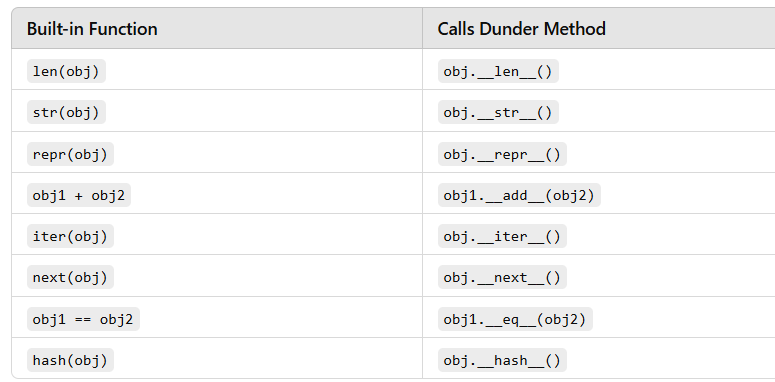

## Operator Overloading

* Addition (+) behaves differently for integers and strings.

* Printing an instance of a class by default shows a vague object representation.

* Special methods can change this behavior.

In [ ]:
print(1 + 2)  # Output: 3
print("a" + "b")  # Output: "ab"

3
ab


## Common Special Methods

### __init__

* Called when an instance of a class is created.
* Initializes instance attributes.

### __repr__ and __str__

* __repr__: Unambiguous representation, useful for debugging.

* __str__: Readable representation for end users.

In [ ]:
class Employee:

  raise_amount = 1.04
  num_of_emps = 0

  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'
    Employee.num_of_emps += 1

  def fullname(self):
    return f"{self.first} {self.last}"

  def apply_raise(self):
    self.pay = int(self.pay * self.raise_amount)

  def __repr__(self):
      return f"Employee('{self.first}', '{self.last}', {self.pay})"

  def __str__(self):
      return f"{self.first} {self.last} - {self.first.lower()}.{self.last.lower()}@company.com"

In [ ]:
emp1 = Employee("John", "Doe", 50000)
print(f"str: {emp1}")  # Uses __str__
print(f"repr: {repr(emp1)}")  # Uses __repr__

str: John Doe - john.doe@company.com
repr: Employee('John', 'Doe', 50000)


## Arithmetic Special Methods

Customize how operators behave for objects.

Example: Summing employee salaries.

In [ ]:
class Employee:

  raise_amount = 1.04
  num_of_emps = 0

  def __init__(self, first, last, pay):
    self.first = first
    self.last = last
    self.pay = pay
    self.email = first + '.' + last + '@company.com'
    Employee.num_of_emps += 1

  def fullname(self):
    return f"{self.first} {self.last}"

  def apply_raise(self):
    self.pay = int(self.pay * self.raise_amount)

  def __add__(self, other):
        return self.pay + other.pay

  def __len__(self):
        return len(self.first + self.last)

emp1 = Employee("John", "Doe", 50000)
emp2 = Employee("Jane", "Smith", 60000)

print(emp1 + emp2)  # Output: 110000

print(len(emp1))  # Output: 8

110000
7


## List of Dunder Methods

https://docs.python.org/3/reference/datamodel.html#special-method-names

# Property Decorator (@property)

* Used to define getter, setter, and deleter methods for attributes.

* Allows **controlled attribute access** while keeping code clean.

In [ ]:
class Employee:
    def __init__(self, first, last):
        self.first = first
        self.last = last

    @property
    def email(self):
        return f"{self.first.lower()}.{self.last.lower()}@company.com"

In [ ]:
emp1 = Employee("John", "Doe")
print(emp1.email)  # Output: john.doe@company.com

john.doe@company.com


# Setter and Deleter

* @property allows an attribute-like interface.

* @attribute.setter and @attribute.deleter provide controlled modification and deletion.

In [ ]:
class Employee:
    def __init__(self, first, last):
        self.first = first
        self.last = last

    @property
    def full_name(self):
        """Getter method"""
        return f"{self.first} {self.last}"

    @full_name.setter
    def full_name(self, name):
        """Setter method"""
        first, last = list(name.split())
        if first == last:
            raise ValueError("Last name cannot be equal to first name.")
        self.first = first
        self.last = last


    @full_name.deleter
    def full_name(self):
        """Deleter method"""
        print("Deleting full name!")
        self.first = None
        self.last = None

In [ ]:
emp1 = Employee("John", "Doe")
emp1.full_name = "Jane Smith"
print(emp1.full_name)  # Output: Jane Smith
del emp1.full_name  # Output: Deleting full name!

Jane Smith
Deleting full name!


In [ ]:
emp1 = Employee("John", "Doe")
print(emp1.full_name)
emp1.full_name = "Jane Jane"
print(emp1.full_name)

John Doe


ValueError: Last name cannot be equal to first name.

## Common Pitfalls

* If you define a property without using an internal variable (typically prefixed with _), you may cause infinite recursion. Never name the getter function and the internal variable with the same name.

* If you define only a getter but try to assign a value, Python will raise an AttributeError.

* Using properties for expensive computations can slow down code unexpectedly.

* If you use del obj.property_name but don’t implement a deleter, Python raises an AttributeError.

* Only use with instance variables, not with class variables

* Python allows using the property() function manually, but the decorator syntax (@property) is more readable and preferred.

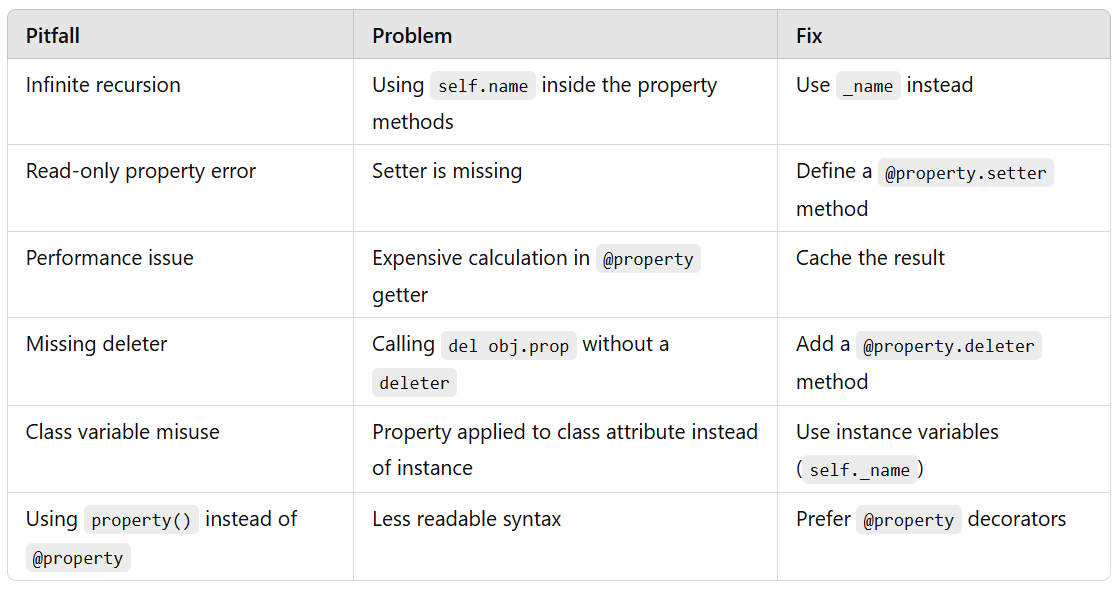

# Collections

* This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.

* https://docs.python.org/3/library/collections.html

In [ ]:
from collections import namedtuple, deque, ChainMap, Counter, defaultdict, UserDict, UserList, UserString

## namedtuple

*  Lightweight, immutable object type.

* https://docs.python.org/3/library/collections.html#collections.namedtuple

In [ ]:
Point = namedtuple('Point', ['x', 'y'])

In [ ]:
p = Point(11, y=22)

In [ ]:
p[0] + p[1]

33

## deque
* Double-ended queue for fast appends and pops.
* https://docs.python.org/3/library/collections.html#deque-objects

In [ ]:
d = deque([1, 2, 3])

In [ ]:
d.append(4)          # Append to the right
d.appendleft(0)      # Append to the left
print("deque after appends:", d)  # Output: deque([0, 1, 2, 3, 4])

d.pop()              # Remove from the right
d.popleft()          # Remove from the left
print("deque after pops:", d)  # Output: deque([1, 2, 3])

deque after appends: deque([0, 1, 2, 3, 4])
deque after pops: deque([1, 2, 3])


## ChainMap
* Groups multiple dictionaries together.

In [ ]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'b': 3, 'c': 4}
chain = ChainMap(dict1, dict2)

print("ChainMap keys:", list(chain.keys()))  # Combined keys; lookup favors first dict
print("ChainMap value for 'b':", chain['b'])   # Output: 2 from dict1

ChainMap keys: ['b', 'c', 'a']
ChainMap value for 'b': 2


## Counter

* Counts occurrences of elements.

In [ ]:
data = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
counter = Counter(data)
print("Counter result:", counter)  # Output: Counter({'apple': 3, 'banana': 2, 'orange': 1})

Counter result: Counter({'apple': 3, 'banana': 2, 'orange': 1})


## defaultdict
* Dictionary with a default value for missing keys.

In [ ]:
dd = defaultdict(list)
dd['fruits'].append('apple')

In [ ]:
dd['fruits'].append('banana')
print("defaultdict:", dict(dd))

defaultdict: {'fruits': ['apple', 'banana']}


In [ ]:
print(dd['x'])

[]


## UserDict
A wrapper around dictionary objects, useful for subclassing.

In [ ]:
class MyDict(UserDict):
    def get_keys(self):
        return list(self.data.keys())

ud = MyDict({'x': 10, 'y': 20})
print("UserDict keys:", ud.get_keys())  # Output: ['x', 'y']

## UserList
A wrapper around list objects, useful for subclassing.

In [ ]:
class MyList(UserList):
    def append_square(self, value):
        self.data.append(value * value)

ul = MyList([1, 2, 3])
ul.append_square(4)
print("UserList:", ul)  # Output: [1, 2, 3, 16]

## UserString: A wrapper around string objects, useful for subclassing.

In [ ]:
class MyString(UserString):
    def shout(self):
        return self.data.upper() + "!!!"

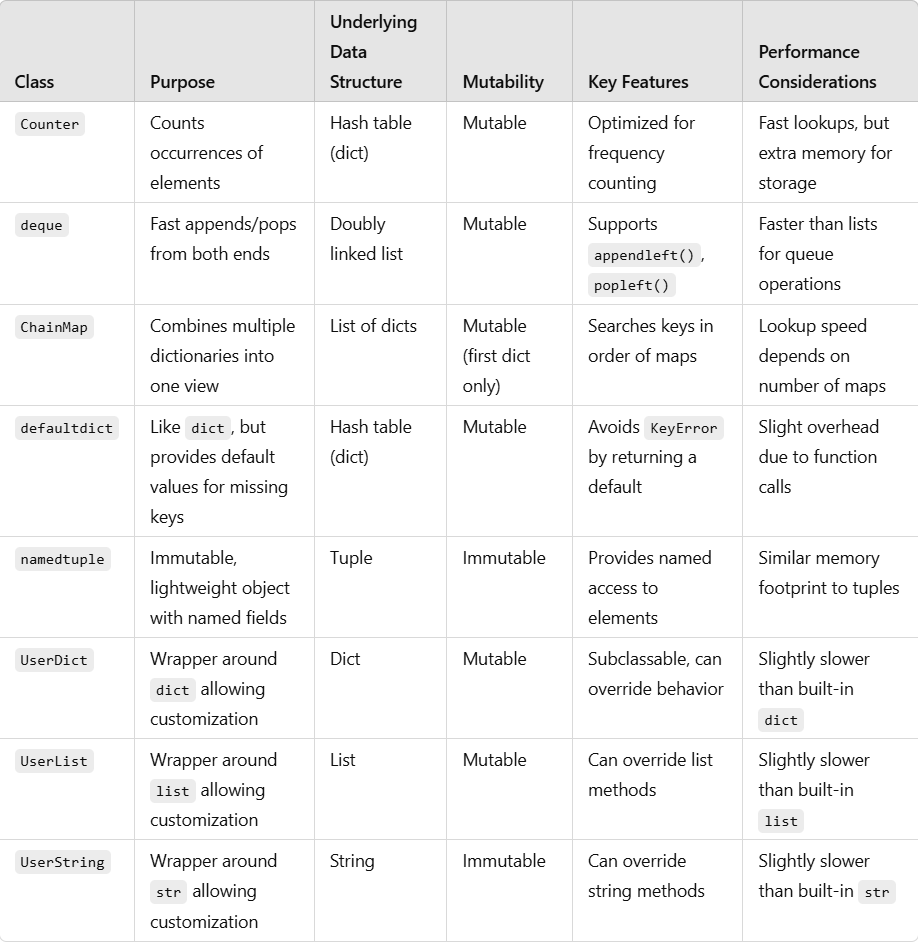